# Ejercicio 1

## ¿Qué es el método de Runge-Kutta y cómo aproxima las soluciones a las EDO?

--> El método de Runge-Kutta es una familia de métodos iterativos para aproximar soluciones de ecuaciones diferenciales ordinarias. El método más conocido dentro de esta familia es el método de Runge-Kutta de cuarto orden (RK4), el cual es una técnica de integración numérica que ofrece una buena combinación de precisión y eficiencia. La idea principal es evaluar la derivada de la función en varios puntos dentro del intervalo de integración y luego combinar estas evaluaciones para obtener una estimación más precisa de la solución. Runge-Kutta aproxima soluciones a las ecuaciones diferenciales ordinarias evaluando la pendiente de la solución en varios puntos dentro de cada intervalo de integración y combinando estas evaluaciones para obtener una estimación precisa de la solución en el siguiente punto. En el caso del método de cuarto orden (RK4), se calculan cuatro pendientes (k1, k2, k3, y k4) en diferentes puntos del intervalo, y luego se hace una media ponderada de estas pendientes para actualizar la solución en el siguiente paso, lo que proporciona una alta precisión y estabilidad en la aproximación.

Fuente: https://compinformatidf.wordpress.com/wp-content/uploads/2018/05/mc3a9todos-de-runge-kutta.pdf

## ¿Cuáles son las ventajas y desventajas del método de Runge-Kutta en comparación con otros métodos numéricos para EDO? (Mencione al menos 2 ventajas y 2 desventajas)

El método Runge-Kutta (RK) ofrece varias ventajas en la resolución de ecuaciones diferenciales ordinarias (EDO) en comparación con otros métodos numéricos. 
1. Tiene una alta precisión en la aproximación de la solución, ya que reduce significativamente el error en comparación con métodos más simples (como el de Euler).
2. Es un método de orden superior (lo que significa que puede proporcionar una mejor aproximación con menos evaluaciones de la función), lo que lo hace más eficiente y rápido en muchos casos, ademeás de ser más fácil de implementar para ciertos escenarios, como problemas complejos. 

Sin embargo, el método RK también presenta algunas desventajas. 
1. Es significativamente más costoso computacionalmente que otros métodos, ya que es necesario evaluar a fondo cada paso de integración, varias veces. Esto lo hace ineficiente con problemas de gran escala. 
2. Existen otros métodos adaptativos, como el método de Adams-Bashforth-Moulton, que pueden ser más eficientes en ciertos casos, especialmente cuando se requiere una alta precisión en la solución.

Fuente: https://www.uv.es/diazj/mne_tema1.pdf
Fuente: https://repositorio.unicordoba.edu.co/server/api/core/bitstreams/18138a4d-af66-4d55-9105-251f7c16b3a7/content

## ¿Cómo se diferencia el método de Euler y el método de Runge-Kutta?

- **Precisión**: El método de Runge-Kutta (especialmente RK4) es mucho más preciso que el método de Euler.
- **Complejidad**: El método de Euler es más simple y fácil de implementar, mientras que el método de Runge-Kutta requiere más cálculos en cada paso.
- **Aplicaciones**: El método de Euler se usa para soluciones rápidas y aproximadas, mientras que el método de Runge-Kutta se prefiere cuando se necesita mayor precisión.

Fuente: http://ljs.academicdirect.org/A32/010_037.htm

## ¿Cómo se puede aplicar el método de Euler y el método de Runge-Kutta modelos epidemiológicos y modelos de depredador-presa?

En modelos como el SIR, el método de Euler puede aplicarlse para aproximar las soluciones a las ED que describen la tasa de cambio de cada grupo de la población en función del tiempo. El método de Euler permite una implementación simple, aunque suele ser menos preciso. Por otro lado, el método de Runge-Kutta de cuarto orden puede proporcionar soluciones más precisas y estables, especialmente para intervalos de tiempo largos, al realizar el cálculo de valores intermedios que mejorarían significativamente la aproximación de la solución.

En el caso de los modelos depredador-presa, ambos métodos pueden aplicarse para estimar las poblaciones de depredadores y presas a lo largo del tiempo. El método de Euler es (de nuevo) mas simple y permite una evaluación superficial de las tendencias generales de las poblaciones. Sin embargo, tienda a ser menos preciso con el tiempo. Por otro lado, el método de Runge-Kutta puede proporcionar una mejor aproximación de las soluciones, especialmente en situaciones donde las interacciones entre depredadores y presas son más complejas y requieren una mayor precisión en la estimación de las poblaciones.


Fuente: https://repositorio.unicordoba.edu.co/server/api/core/bitstreams/18138a4d-af66-4d55-9105-251f7c16b3a7/content

# Ejercicio 2

## 2.1 - Crecimiento poblacional

Considere el modelo de crecimiento logístico dado por la ecuación diferencial:
$$
\frac{dP}{dt} = rP \left(1 - \frac{P}{K}\right)
$$
Donde: \( P \) es la población en el tiempo, \( r \) es el ratio de crecimiento y \( K \) es la capacidad de carga.

Dado:
- Población inicial P0 = 10
- Ratio de crecimiento r = 0.1
- Capacidad de carga K = 1,000
- Paso del tiempo h = 0.1
- Tiempo total T = 20



Use el método de 4to orden de Runge-Kutta para estimar la población sobre el tiempo y grafique los resultados.

Interprete la gráfica y responda ¿cuál es el estimado de la población en tiempo T = 20?

In [136]:
import numpy as np
import matplotlib.pyplot as plt

In [137]:
# Parametros
P0 = 10
r = 0.1
K = 1000
h = 0.1
T = 20

In [138]:
# Definicion de la ecuacion diferencial
def f(t, P):
    return r * P * (1 - P / K)

In [139]:
# Método de Runge-Kutta de cuarto orden
def rungeKutta(P0, h, T):
    N = int(T / h)  # Número de pasos
    t_values = np.arange(0, T + h, h)
    P_values = np.zeros(len(t_values))
    
    P_values[0] = P0
    
    for i in range(N):
        t = t_values[i]
        P = P_values[i]
        
        k1 = f(t, P)
        k2 = f(t + h / 2, P + h / 2 * k1)
        k3 = f(t + h / 2, P + h / 2 * k2)
        k4 = f(t + h, P + h * k3)
        
        P_values[i + 1] = P + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
    
    return t_values, P_values

In [140]:
# Cálculo de los valores usando Runge-Kutta
t_values, P_values = rungeKutta(P0, h, T)


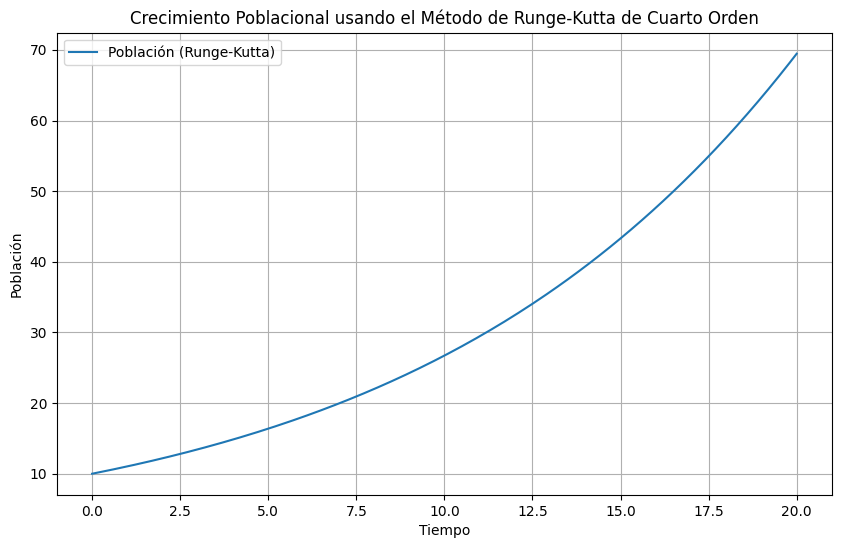

In [141]:
# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(t_values, P_values, label='Población (Runge-Kutta)')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Crecimiento Poblacional usando el Método de Runge-Kutta de Cuarto Orden')
plt.legend()
plt.grid(True)
plt.show()

In [142]:
# Estimado de la población en T = 20
P_estimated = P_values[-1]
print(f"\033[1mSe estima que habrá una población de {P_estimated:.0f} individuos para un tiempo T = 20\033[0m")

Se estima que habrá una población de 69 individuos para un tiempo T = 20


Se estima que habrá una población de 69 individuos para tiempo T = 20.

## 2.2 - Depredador - Presa

Considere el modelo de depredador-presa de Lotka-Volterra, dado por las siguientes ecuaciones diferenciales:

$$
\frac{dR}{dt} = \alpha R - \beta RP
$$

$$
\frac{dP}{dt} = \delta RP - \gamma P
$$

Donde:
- \( R \) es la población de la presa
- \( P \) es la población de los depredadores
- \( \alpha \) es el ratio de crecimiento natural de la presa
- \( \beta \) es el coeficiente del ratio de depredación
- \( \delta \) es el ratio de reproducción de los depredadores por presa comida
- \( \gamma \) es el ratio de muerte de los depredadores

Dado:
- R0 = 40
- P0 = 9
- ɑ = 0.1
- β = 0.02
- δ = 0.01
- γ = 0.1
- Paso de tiempo h = 0.1
- Tiempo total T = 50


Utilice el método de cuarto orden de Runge-Kutta para estimar las poblaciones a lo largo del tiempo y trazar el
resultado. Interprete las gráficas y responda ¿cuál es el estimado de las poblaciones en tiempo T = 50?

In [143]:
# Parámetros del problema
R0 = 40
P0 = 9
alpha = 0.1
beta = 0.02
delta = 0.01
gamma = 0.1
h = 0.1
T = 50

In [144]:
# Funciones que definen las ecuaciones diferenciales
def dR_dt(R, P):
    return alpha * R - beta * R * P

def dP_dt(R, P):
    return delta * R * P - gamma * P

In [145]:
def rungeKutta(R0, P0, h, T):
    N = int(T / h)  # Número de pasos
    t_values = np.arange(0, T + h, h)
    R_values = np.zeros(len(t_values))
    P_values = np.zeros(len(t_values))
    
    R_values[0] = R0
    P_values[0] = P0
    
    for i in range(N):
        R = R_values[i]
        P = P_values[i]
        
        k1_R = dR_dt(R, P)
        k1_P = dP_dt(R, P)
        
        k2_R = dR_dt(R + h / 2 * k1_R, P + h / 2 * k1_P)
        k2_P = dP_dt(R + h / 2 * k1_R, P + h / 2 * k1_P)
        
        k3_R = dR_dt(R + h / 2 * k2_R, P + h / 2 * k2_P)
        k3_P = dP_dt(R + h / 2 * k2_R, P + h / 2 * k2_P)
        
        k4_R = dR_dt(R + h * k3_R, P + h * k3_P)
        k4_P = dP_dt(R + h * k3_R, P + h * k3_P)
        
        R_values[i + 1] = R + (h / 6) * (k1_R + 2 * k2_R + 2 * k3_R + k4_R)
        P_values[i + 1] = P + (h / 6) * (k1_P + 2 * k2_P + 2 * k3_P + k4_P)
    
    return t_values, R_values, P_values

In [146]:
# Cálculo de los valores usando Runge-Kutta
t_values, R_values, P_values = rungeKutta(R0, P0, h, T)

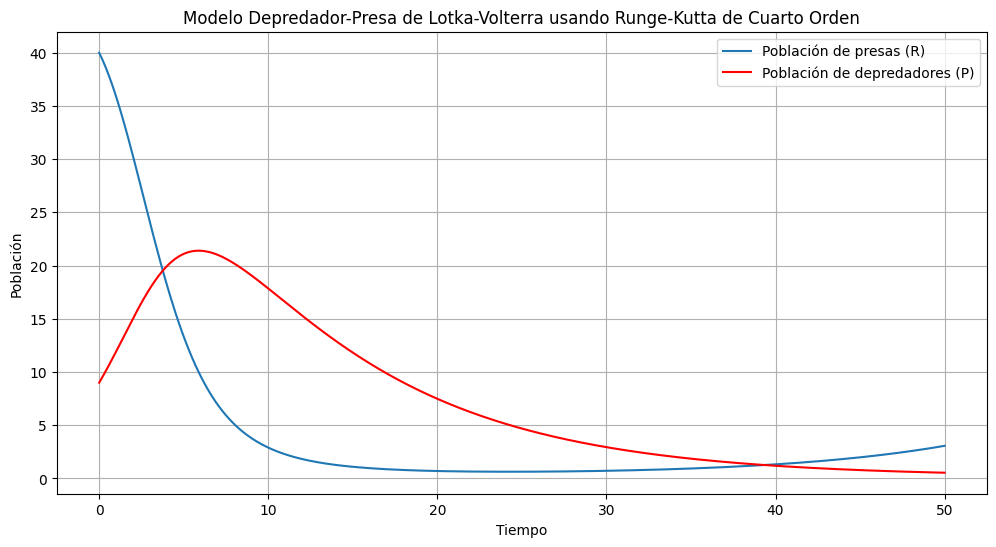

In [147]:
# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(t_values, R_values, label='Población de presas (R)')
plt.plot(t_values, P_values, label='Población de depredadores (P)', color='red')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Modelo Depredador-Presa de Lotka-Volterra usando Runge-Kutta de Cuarto Orden')
plt.legend()
plt.grid(True)
plt.show()

In [148]:
# Estimado de las poblaciones en T = 50
R_estimated = R_values[-1]
P_estimated = P_values[-1]
R_estimated, P_estimated
print(f"\033[1mPara un tiempo T = {T}, se estima una población de presas de {R_estimated:.0f} y una población de depredadores de {P_estimated:.0f}\033[0m")

Para un tiempo T = 50, se estima una población de presas de 3 y una población de depredadores de 1


Con esta aproximación, podemos observar que para un tiempo de T = 50 se tienen 3 presas y 1 depredador, debido a que se aproximan ya que no es posible tener no enteros en dichas poblaciones.

[Gitbub](https://github.com/angelcast2002/LAB-03-MS.git)